# Домашнее задание 5. Градиентный спуск. (10 баллов + 2 балла бонус)

В этом домашнем задании вы реализуете градиентный спуск для линейной регрессии, а также изучите, как он ведёт себя при разных параметрах и с разными функциями потерь.

Правила:

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания всем участникам нарушения будет выставлено 0 баллов, независимо от того, кто у кого списывал.

* Старайтесь сделать код максимально оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, рассмотренных в курсе.  

In [2]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

In [3]:
import locale
locale.setlocale(locale.LC_ALL, "ru_RU.UTF-8")

'ru_RU.UTF-8'

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — **Mean Squared Error (MSE)**:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов.

Чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его **не нужно**. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса.
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять градиент функции потерь по параметрам модели.

In [4]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число - значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`.

Он должен вычислять лосс и градиент по формулам наверху.

In [5]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return np.mean((X @ w - y) ** 2)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return 2 / X.shape[0] * X.T @ (X @ w - y)

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [6]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^{t+1} = w^{t} - \eta \nabla_{w} Q(w^{t}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`.

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше, и возвращать
траекторию спуска (список из новых значений весов на каждом шаге).

In [7]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_features,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int --сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    """
    trajectory = [w_init] # сохраним начальную точку
    for _ in range(n_iterations):
        w_init = w_init - lr * loss.calc_grad(X, y, w_init)
        trajectory.append(w_init)
    
    return np.array(trajectory)

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории.

In [8]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :] # разные масштабы признаков
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [9]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450264
0.8670644395649493


In [10]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)

    #plt.gca().set_aspect("equal")  --ПЛОХО РАБОТАЕТ КОГДА МАЛЕНКИЕ ИЗМЕНЕНИЯ ПО ОДНОЙ ИЗ ОСЕЙ

    # Отображение уровня функции потерь
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # Отображение траектории спуска
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте четыре и более различных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска.

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`.
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1.

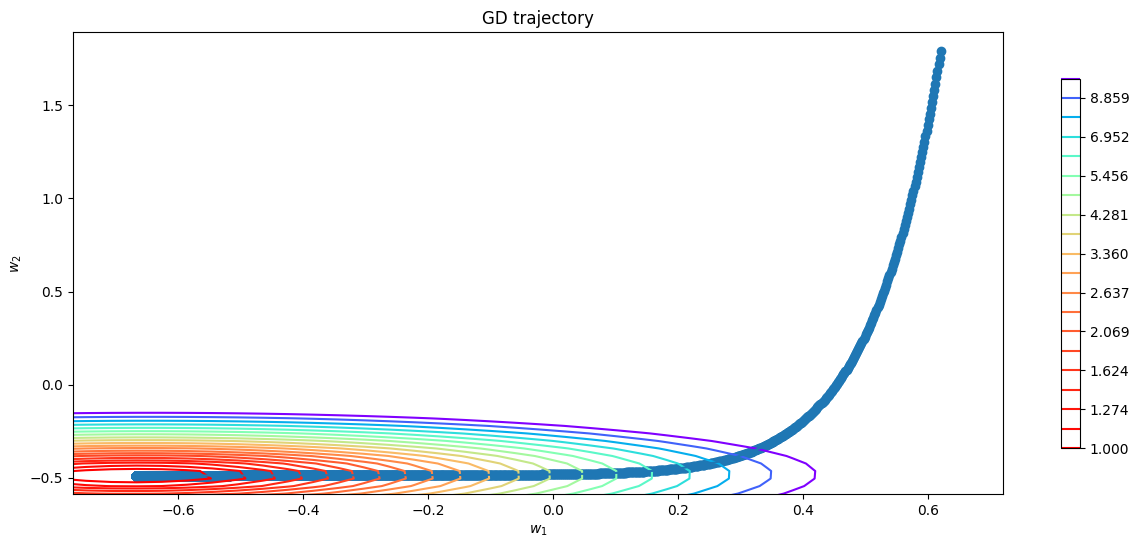

In [11]:
w_list = gradient_descent(w_init, X, y, loss, 0.0001)
plot_gd(w_list, X, y, loss)

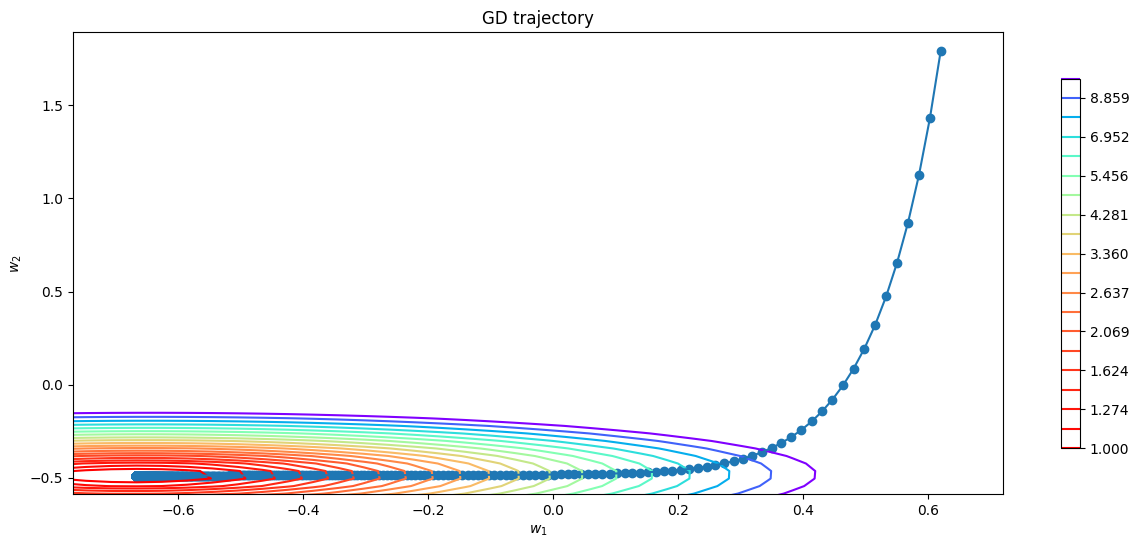

In [12]:
w_list = gradient_descent(w_init, X, y, loss, 0.001)
plot_gd(w_list, X, y, loss)

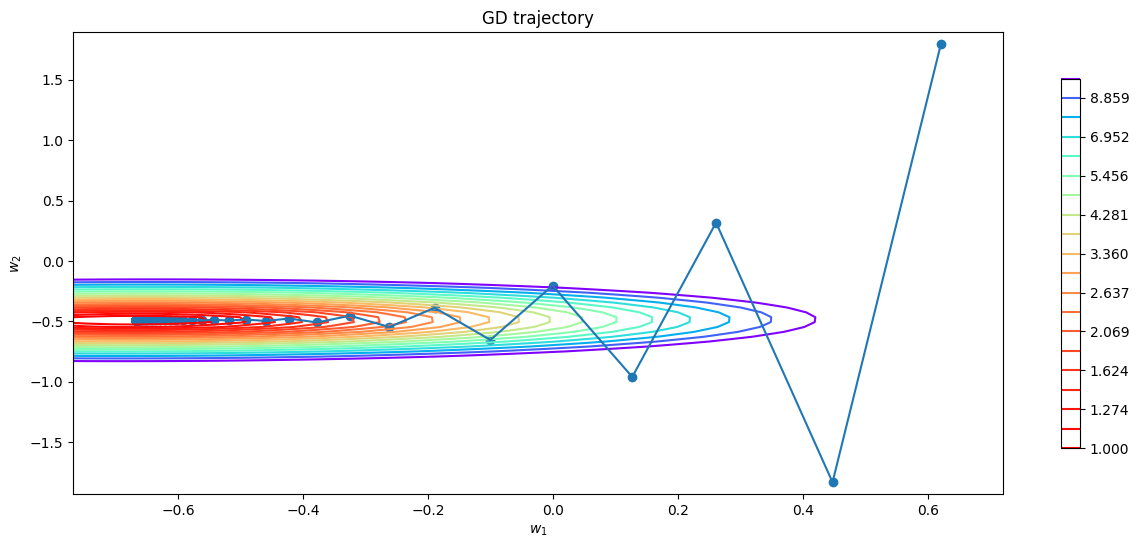

In [13]:
w_list = gradient_descent(w_init, X, y, loss, 0.01)
plot_gd(w_list, X, y, loss)

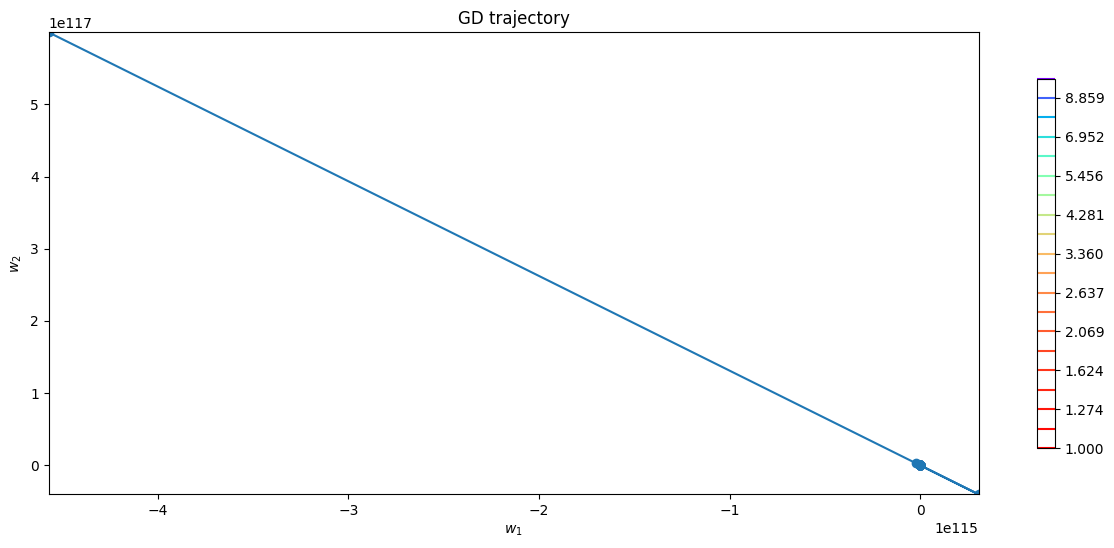

In [14]:
w_list = gradient_descent(w_init, X, y, loss, 0.1, 100)
plot_gd(w_list, X, y, loss)

#### Вывод:
Градиентный спуск был запущен при разных значениях learning rate - 0.0001, 0.001, 0.01 и 0.1. Количество шагов было оставлено по умолчанию (100 000). При всех значениях lr, кроме 0.1 градиентный спуск сходился, при 0.1, видимо "перепрыгивал" область минимума. Значение lr влияет на плавность траектории спуска, на возможность перепрыгивать локальные минимумы и застревать в них. Маленький шаг обучения может не успевать доходить до области минимума, когда количество шагов мало, например, при 100 шагах lr=0.0001 будет очень далеко, а lr=0.001 почти доберется.

Теперь реализуем стохастический градиентный спуск.

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`.

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [28]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_features,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    trajectory = [w_init] # сохраним начальную точку
    for _ in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        w_init = w_init - lr * loss.calc_grad(X[batch_indices], y[batch_indices], w_init)
        trajectory.append(w_init)
    
    return np.array(trajectory)

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного? Что происходит при малых и больших `batch_size`?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

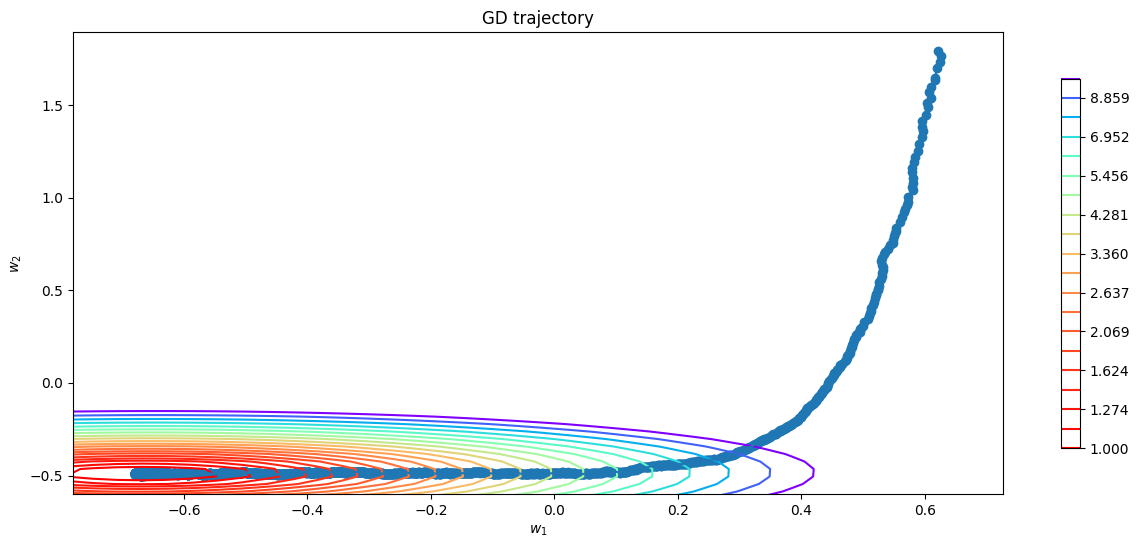

In [16]:
w_list = stochastic_gradient_descent(w_init, X, y, loss, lr=0.0001, batch_size=10, n_iterations=100000)
plot_gd(w_list, X, y, loss)

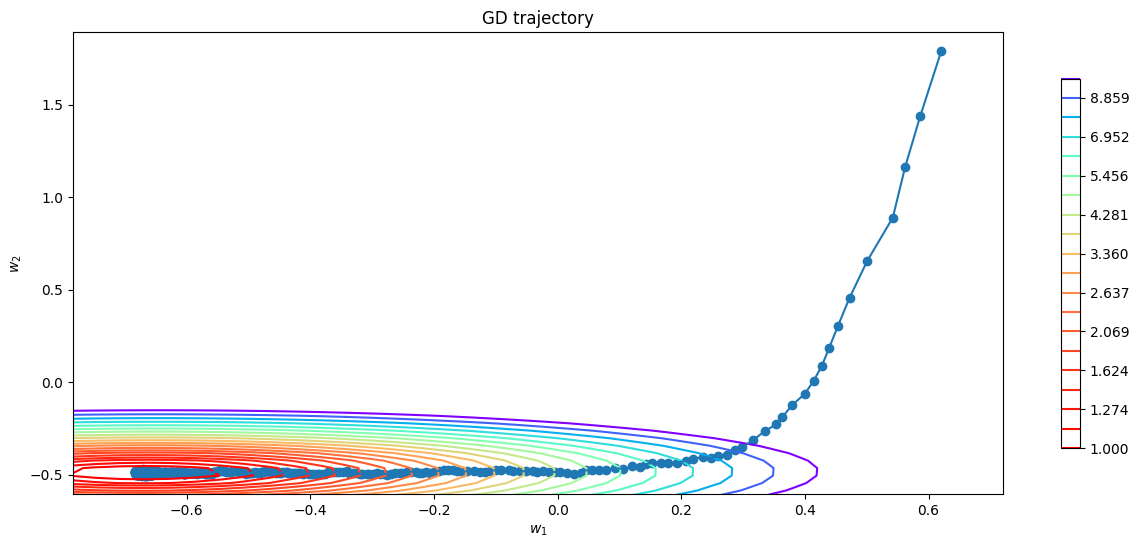

In [17]:
w_list = stochastic_gradient_descent(w_init, X, y, loss, lr=0.001, batch_size=50, n_iterations=100000)
plot_gd(w_list, X, y, loss)

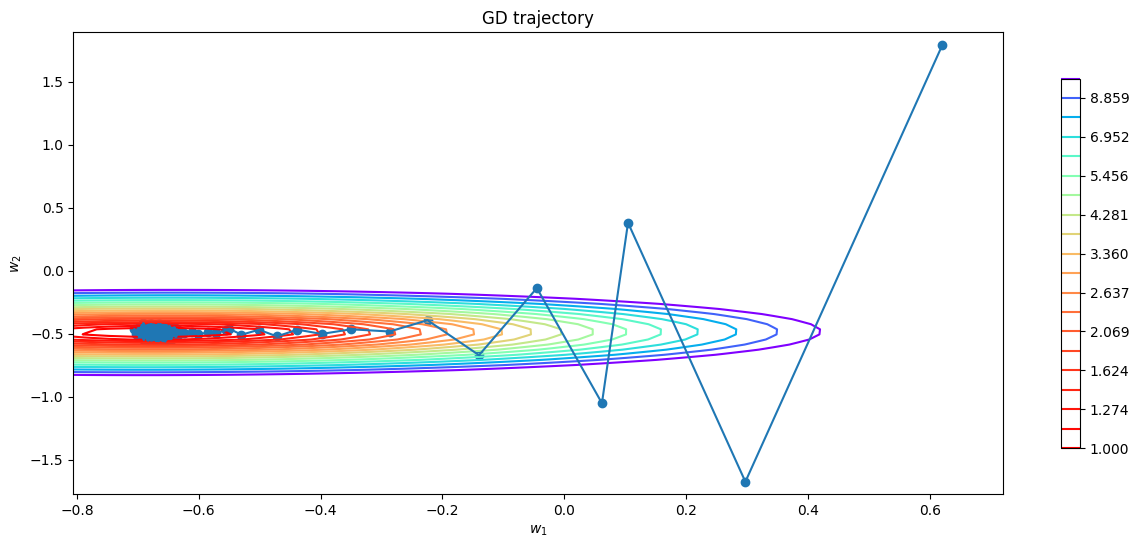

In [18]:
w_list = stochastic_gradient_descent(w_init, X, y, loss, lr=0.01, batch_size=100, n_iterations=100000)
plot_gd(w_list, X, y, loss)

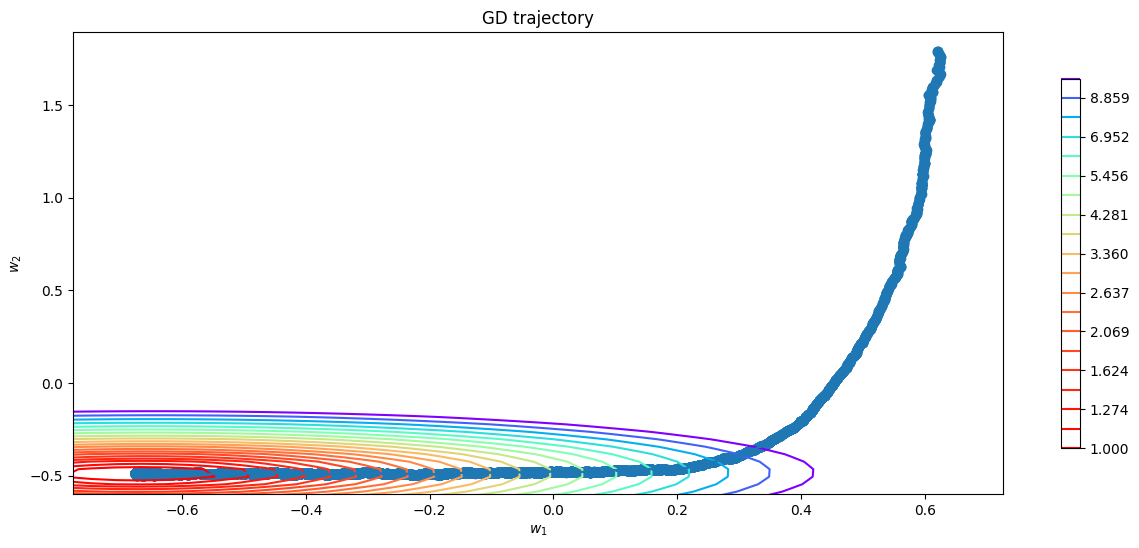

In [19]:
w_list = stochastic_gradient_descent(w_init, X, y, loss, lr=0.00001, batch_size=1, n_iterations=100000)
plot_gd(w_list, X, y, loss)

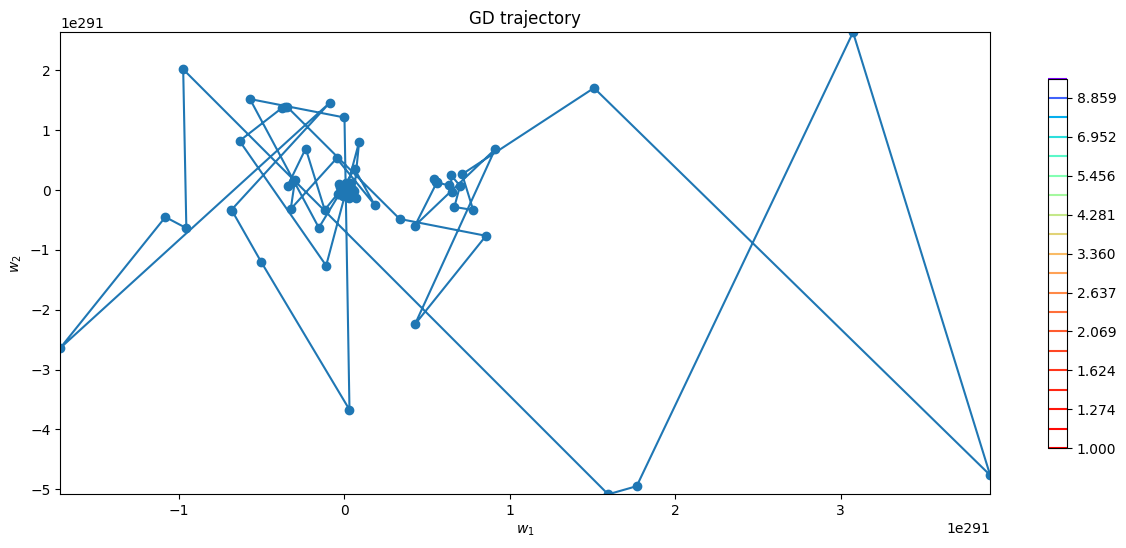

In [21]:
w_list = stochastic_gradient_descent(w_init, X, y, loss, lr=0.01, batch_size=1, n_iterations=100000)
plot_gd(w_list, X, y, loss)

#### Вывод
Стохаостический градиентный спуск был запущен при разных значениях lr и batch_size - (0.0001, 10), (0.001, 50), (0.01, 100), (0.00001, 1), (0.01, 1). Количество итераций для всех было установлено 100 000. Самым неудачным получился вариант с lr=0.01 и batch_size=1, хотя lr=0.01 и batch_size=100 сошелся. Запущенные выше примеры показывают, что для имеющихся данных маленкий lr может компенсировать маленький batch_size (пример с lr=0.00001, batch_size=1) при достаточном количестве итераций. Самым оптимальным решением с нормальным качеством в данном случае, скорее всего будет являться lr=0.01, batch_size=100. При таких параметрах сложность алгоритма невысока, а качество всё ещё приемлемо.

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы точнее этого минимума достигнуть и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [22]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
    s0 : float = 1.0
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float - параметр величины шага, на который нужно домножать градиент
    :param batch_size: int - размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float - значение степени в формуле затухания длины шага
    :param n_iterations: int - сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    """
    trajectory = [w_init] # сохраним начальную точку
    for t in range(n_iterations):
        eta = lr * (s0 / (t + s0) ** p)
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        w_init = w_init - eta * loss.calc_grad(X[batch_indices], y[batch_indices], w_init)
        trajectory.append(w_init)
    
    return np.array(trajectory)

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска. Что происходит при маленьком или большом значении p?

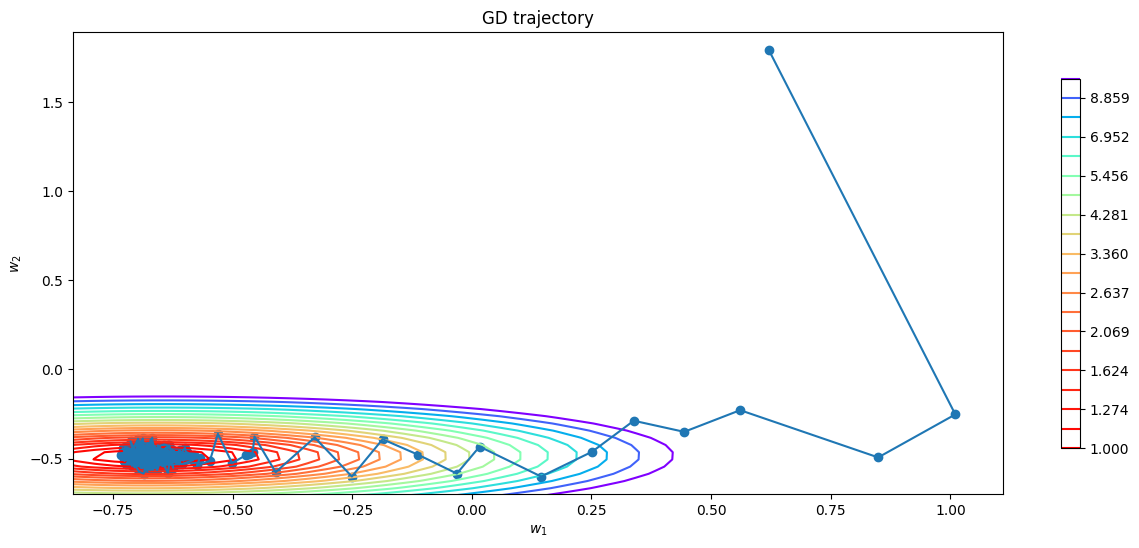

In [23]:
w_list = stochastic_gradient_descent(w_init, X, y, loss, lr=0.01, batch_size=10, p=0.1)
plot_gd(w_list, X, y, loss)

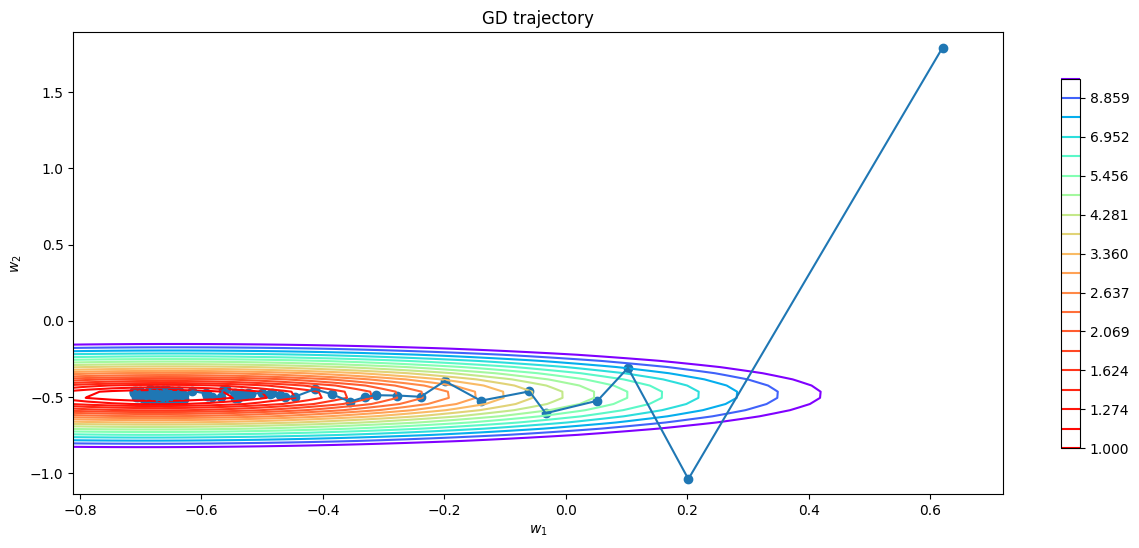

In [24]:
w_list = stochastic_gradient_descent(w_init, X, y, loss, lr=0.01, batch_size=10, p=0.3)
plot_gd(w_list, X, y, loss)

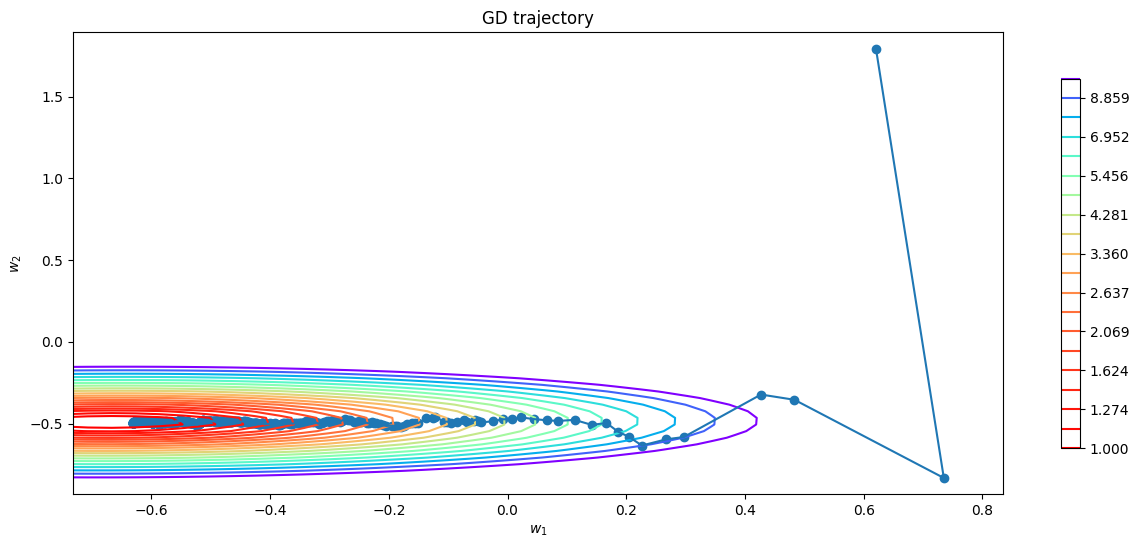

In [25]:
w_list = stochastic_gradient_descent(w_init, X, y, loss, lr=0.01, batch_size=10, p=0.7)
plot_gd(w_list, X, y, loss)

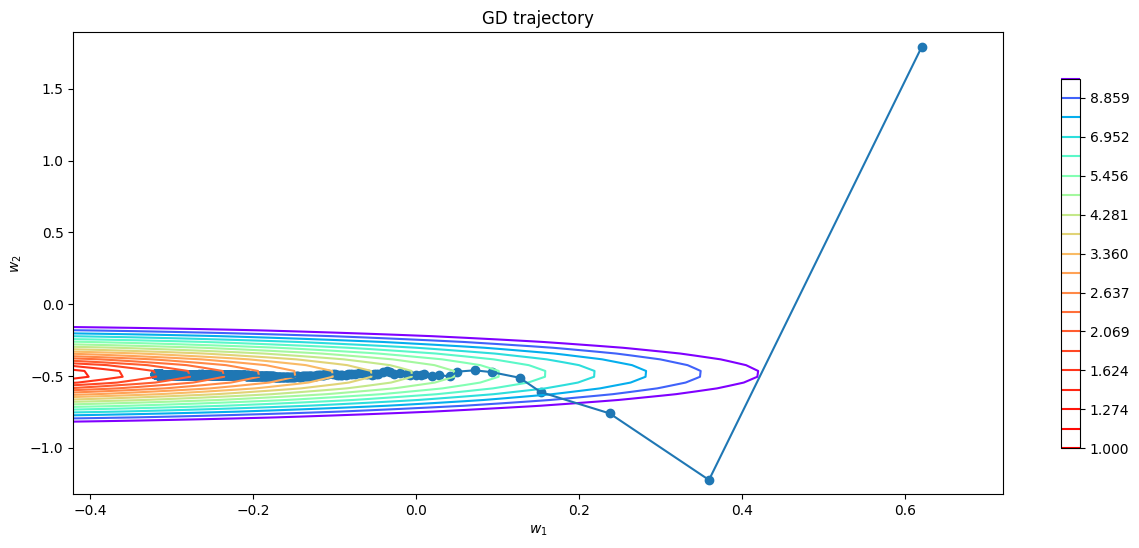

In [26]:
w_list = stochastic_gradient_descent(w_init, X, y, loss, lr=0.01, batch_size=10, p=1)
plot_gd(w_list, X, y, loss)

#### Вывод
На имеющихся данных градиентный спуск сошелся почти со всем значениями p, кроме 1, не хватило итераций, тк шаг слишком быстро стал маленьким. При маленьком значении p траектория спуска не такая плавная, как при других p, тк шаг все еще большой (на крутой части плоскости). Но спуск сошелся быстрее всех и долго делал бесполезные колебания в области минимума.

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

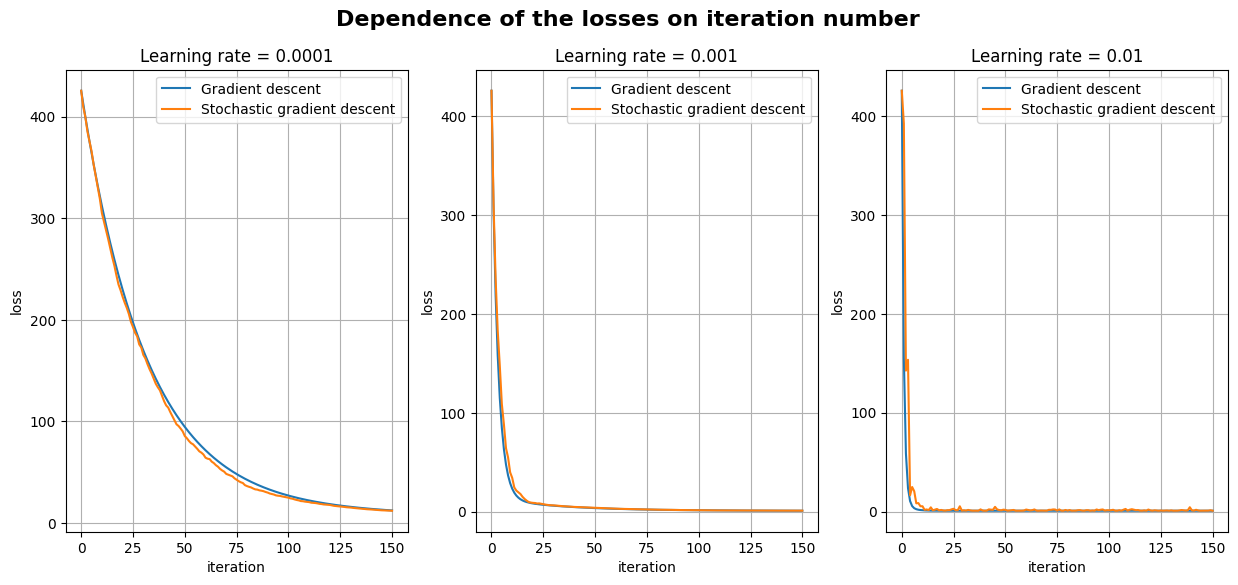

In [29]:
"""ДЛЯ ИСКЛЮЧЕНИЯ ЗАТУХАЮЩЕГО ШАГА ИСПОЛЬЗУЕТСЯ РЕАЛИЗАЦИЯ stochastic_gradient_descent ИЗ 1.4, ТК ОН ТОЖЕ ВЛИЯЕТ"""
np.random.seed(1337)

figure, axes = plt.subplots(1, 3, figsize=(15, 6))

n_iters = 150
lrs = [0.0001, 0.001, 0.01]

for i in range(len(lrs)):
    w_list = gradient_descent(w_init, X, y, loss, lrs[i], n_iterations=n_iters)
    losses = [loss.calc_loss(X, y, w_i) for w_i in w_list]
    axes[i].plot(losses, label='Gradient descent')
    w_list = stochastic_gradient_descent(w_init, X, y, loss, lrs[i], n_iterations=n_iters, batch_size=10)
    losses = [loss.calc_loss(X, y, w_i) for w_i in w_list]
    axes[i].plot(losses, label='Stochastic gradient descent')
    axes[i].set_xlabel('iteration')
    axes[i].set_ylabel('loss')
    axes[i].set_title(f'Learning rate = {lrs[i]}')
    axes[i].legend()
    axes[i].grid()

plt.suptitle('Dependence of the losses on iteration number', fontsize=16, fontweight='bold')
plt.legend()
plt.show()


#### Вывод
На графике не видно преймуществ SGD. SGD обычно сходится за большее количество итераций, чем классический градиентный спуск. Стохаостическая версия создана для уменьшения количества вычислений на каждой итерации, тк берется только часть данных. Преимущества SGD могут быть видны на графиках зависимости времени от лосса или количества операций от лосса.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`.

В методе `predict` мы будем применять нашу регрессию к датасету.

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`.

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [30]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1, n_iterations : int = 1_000_000) -> None:
        self.loss = loss
        self.lr = lr
        self.n_iterations = n_iterations

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        self.w = np.zeros(shape=X.shape[1])
        
        self.trajectory = gradient_descent(self.w, X, y, self.loss, lr=self.lr, n_iterations=self.n_iterations)
        self.w = self.trajectory[-1]

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return X @ self.w

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [31]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [32]:
import pandas as pd

X_raw = pd.read_csv(
    "cars_data.csv",
    header=None,
    na_values=["?"],
    skiprows=1,
    index_col=0
)
X_raw = X_raw[~X_raw[26].isna()].reset_index(drop=True)
X_raw.head()

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [33]:
X_raw.columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 
                 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 
                 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
                 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
                 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'] # назовем признаки

In [34]:
y = X_raw['price']
X_raw = X_raw.drop('price', axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

#### Разделение:

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.3, random_state=478, shuffle=True)

#### Заполнение:

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer

imputer = ColumnTransformer(
    [('knn-imp', KNNImputer(n_neighbors=5), ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']), # организуем заполнение по кнн для числовых
    ('most-freq', SimpleImputer(strategy='most_frequent'), ['num-of-doors'])],
    remainder='passthrough'
)

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=imputer.get_feature_names_out())
X_test = pd.DataFrame(imputer.transform(X_test), columns=imputer.get_feature_names_out())

In [37]:
X_train.columns = [name.split('__')[1] for name in X_train.columns] # уберем дополнения от imputer`a в заголовках
X_test.columns = [name.split('__')[1] for name in X_test.columns]

In [38]:
X_train.isna().sum().sum() == X_test.isna().sum().sum() == 0

np.True_

#### Нормализация:

In [39]:
# Вернем типы после заполнения пропусков
X_train = X_train.astype({
    'symboling' : 'int',
    'normalized-losses' : 'float',
    'make' : 'category',
    'fuel-type' : 'category',
    'aspiration' : 'category',
    'num-of-doors' : 'category',
    'body-style' : 'category',
    'drive-wheels' : 'category',
    'engine-location' : 'category',
    'wheel-base' : 'float',
    'length' : 'float',
    'width' : 'float',
    'height' : 'float',
    'curb-weight' : 'int',
    'engine-type' : 'category',
    'num-of-cylinders' : 'category',
    'engine-size' : 'int',
    'fuel-system' : 'category',
    'bore' : 'float',
    'stroke' : 'float',
    'compression-ratio' : 'float',
    'horsepower' : 'float',
    'peak-rpm' : 'float',
    'city-mpg' : 'int',
    'highway-mpg' : 'int'
})
X_test = X_test.astype({
    'symboling' : 'int',
    'normalized-losses' : 'float',
    'make' : 'category',
    'fuel-type' : 'category',
    'aspiration' : 'category',
    'num-of-doors' : 'category',
    'body-style' : 'category',
    'drive-wheels' : 'category',
    'engine-location' : 'category',
    'wheel-base' : 'float',
    'length' : 'float',
    'width' : 'float',
    'height' : 'float',
    'curb-weight' : 'int',
    'engine-type' : 'category',
    'num-of-cylinders' : 'category',
    'engine-size' : 'int',
    'fuel-system' : 'category',
    'bore' : 'float',
    'stroke' : 'float',
    'compression-ratio' : 'float',
    'horsepower' : 'float',
    'peak-rpm' : 'float',
    'city-mpg' : 'int',
    'highway-mpg' : 'int',
})

In [40]:
numeric = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 
           'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower','peak-rpm', 'city-mpg', 'highway-mpg']

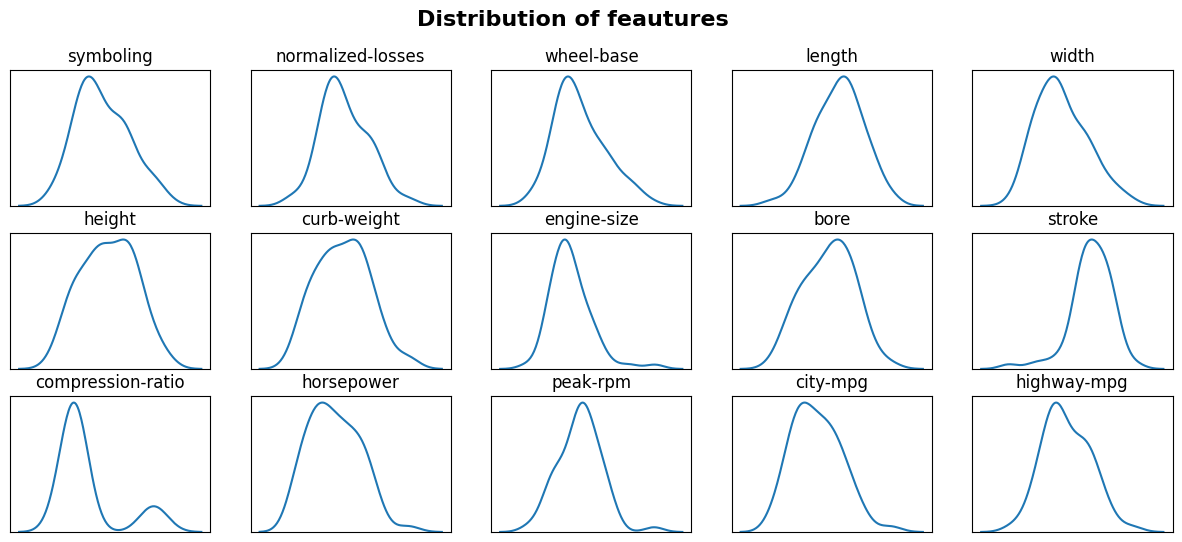

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig, axes = plt.subplots(3, 5, figsize=(15, 6))
fig.suptitle('Distribution of feautures', fontweight='bold', fontsize=16)
for name, ax in zip(numeric, axes.flatten()):
    sns.kdeplot(X_train[name].add(X_test[name]), label=name, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(f'{name}')
    ax.set_yticks([])
    ax.set_xticks([])

plt.show()

#### Так как почти все данные приблизительно распределены нормально, воспользуемся StandardScaler`ом

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[numeric] = scaler.fit_transform(X_train[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

#### Закодируем категориальные признаки:

In [43]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False, drop='first')

categorical = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
               'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',  'fuel-system']

for name in categorical:
    encoded_columns = enc.fit(X_raw[[name]])

    encoded_columns = enc.transform(X_train[[name]])
    encoded_df = pd.DataFrame(encoded_columns, columns=enc.get_feature_names_out([name]), dtype=int)
    X_train = pd.concat([X_train, encoded_df], axis=1)
    X_train.drop(columns=[name], inplace=True)

    encoded_columns = enc.transform(X_test[[name]])
    encoded_df = pd.DataFrame(encoded_columns, columns=enc.get_feature_names_out([name]), dtype=int)
    X_test = pd.concat([X_test, encoded_df], axis=1)
    X_test.drop(columns=[name], inplace=True)

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [44]:
linear_regression = LinearRegression(MSELoss(), lr=0.001, n_iterations=200000)
linear_regression.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [45]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, linear_regression.predict(X_train))
mse_test = mean_squared_error(y_test, linear_regression.predict(X_test))
print('MSE on train', locale.format_string('%.2f', mse_train, grouping=True))
print('MSE on test', locale.format_string('%.2f', mse_test, grouping=True))

MSE on train 1185990.35
MSE on test 10178064.96


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации.

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`.

Он должен вычислять лосс и градиент по формулам выше.

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`.

In [46]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        return np.mean((X @ w - y) ** 2) + self.coef * np.sum(w[:-1] ** 2)


    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return 2 / X.shape[0] * X.T @ (X @ w - y) + 2 * self.coef * np.concatenate((w[:-1], [0]))

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [47]:
linear_regression = LinearRegression(MSEL2Loss(0.1), lr=0.001, n_iterations=200000)

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [48]:
linear_regression.fit(X_train, y_train)
print('MSE on train', locale.format_string('%.2f', mse_train, grouping=True))
print('MSE on test', locale.format_string('%.2f', mse_test, grouping=True))
print('MSE L2 on train', locale.format_string('%.2f', mean_squared_error(y_train, linear_regression.predict(X_train)), grouping=True))
print('MSE L2 on test', locale.format_string('%.2f', mean_squared_error(y_test, linear_regression.predict(X_test)), grouping=True))

MSE on train 1185990.35
MSE on test 10178064.96
MSE L2 on train 5133879.22
MSE L2 on test 9160486.23


#### Ошибка на тесте с регуляризацией стала меньше -> модель лучше обобщает

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`.

Он должен вычислять лосс и градиент по формулам выше.

In [49]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        z = X @ w - y
        
        loss = np.where(np.abs(z) < self.eps, 0.5 * z ** 2, self.eps * (np.abs(z) - 0.5 * self.eps))
        return np.mean(loss)
    


    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        z = X @ w - y
        grad_z = np.where(np.abs(z) < self.eps, z, self.eps * np.sign(z))

        return X.T @ grad_z / X.shape[0]

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [50]:
linear_regression = LinearRegression(HuberLoss(1.59), lr=0.01, n_iterations=9_000_000)
linear_regression.fit(X_train, y_train)

print('MSE on train', locale.format_string('%.2f', mse_train, grouping=True))
print('MSE on test', locale.format_string('%.2f', mse_test, grouping=True))
print('MSE HuberLoss on train', locale.format_string('%.2f', mean_squared_error(y_train, linear_regression.predict(X_train)), grouping=True))
print('MSE HuberLoss on test', locale.format_string('%.2f', mean_squared_error(y_test, linear_regression.predict(X_test)), grouping=True))

MSE on train 1185990.35
MSE on test 10178064.96
MSE HuberLoss on train 3269056.68
MSE HuberLoss on test 10335384.55


#### Модели показывают схожее качество, но с HuberLoss потребовалось гораздо больше шагов градиентного спуска

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2025 в ячейку ниже:

<img src="https://static.wikia.nocookie.net/brainrotnew/images/d/df/Anomali_tung_tung_tung.png/revision/latest?cb=20250417061140" style="height: 300px; object-fit: contain;">
<img src="https://static.wikia.nocookie.net/brainrotnew/images/f/f1/Lirili_rili_ralila.png/revision/latest?cb=20250324152453" style="height: 300px; object-fit: contain;">
<img src="https://static.wikia.nocookie.net/brainrotnew/images/f/ff/Ballerina_Cappucina.jpg/revision/latest?cb=20250413201033" style="height: 300px; object-fit: contain;">
<img src="https://static.wikia.nocookie.net/brainrotnew/images/6/6d/Comb3.png/revision/latest?cb=20250414212355" style="height: 300px; object-fit: contain;">
<img src="https://static.wikia.nocookie.net/brainrotnew/images/a/ac/Tralalero_tralala.jpg/revision/latest?cb=20250321131418" style="height: 300px; object-fit: contain;">
<img src="https://static.wikia.nocookie.net/brainrotnew/images/f/f7/Brr_Brr_Patapim.png/revision/latest?cb=20250326180223" style="height: 300px; object-fit: contain;">
<img src="https://static.wikia.nocookie.net/brainrotnew/images/1/14/640.jpg/revision/latest?cb=20250416053733" style="height: 300px; object-fit: contain;">
<img src="https://static.wikia.nocookie.net/brainrotnew/images/1/10/Bombardiro_Crocodilo.jpg/revision/latest?cb=20250417102447" style="height: 300px; object-fit: contain;">
<img src="https://static.wikia.nocookie.net/brainrotnew/images/d/dc/Spijuniro_Golubiro.png/revision/latest?cb=20250408141300" style="height: 300px; object-fit: contain;">
<img src="https://static.wikia.nocookie.net/brainrotnew/images/7/72/Glorbofruttodrillo.jpeg/revision/latest?cb=20250328131308" style="height: 300px; object-fit: contain;">

### БОНУС (2 балла)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2 балла)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределения с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [49]:
def neighbor_func(w, freedom : int):
    return w + np.random.standard_t(freedom, size=w.shape)

In [50]:
def simulated_annealing(loss : BaseLoss, X : np.ndarray, y : np.ndarray, w_init, temperature : float = 1e10, cooling_rate : float = 0.99, 
                        neighbor_function=neighbor_func, min_temperature=1e-10, max_iterations=1000, fit_intercept=True, freedom : int = 3):
    
    cur_w = w_init
    if fit_intercept:
        X = np.hstack((X.copy(), np.ones(shape=(X.shape[0], 1))))
        
    cur_loss = loss.calc_loss(X, y, cur_w)
    best_w = cur_w
    best_loss = cur_loss
    
    losses = [cur_loss]
    trajectory = [w_init]
    
    iteration = 0
    
    while temperature > min_temperature and iteration < max_iterations:
        new_w = neighbor_function(cur_w, freedom)
        new_loss = loss.calc_loss(X, y, new_w)
        
        if new_loss - cur_loss < 0: 
            cur_w = new_w
            cur_loss = new_loss
            
            if cur_loss < best_loss:
                best_w = cur_w
                best_loss = cur_loss
        else:
            if np.random.rand() < np.exp(-(new_loss - cur_loss) / temperature):
                cur_w = new_w
                cur_loss = new_loss
    
        temperature *= cooling_rate
        iteration += 1
        
        trajectory.append(cur_w)
        losses.append(cur_loss)
    
    return best_w, np.array(losses), np.array(trajectory)

In [51]:
w = np.zeros(shape=(X_train.shape[1] + 1))
w, loss_list, w_list = simulated_annealing(MSEL2Loss(.1), X_train, y_train, w, max_iterations=650000, temperature=10e22, cooling_rate=0.9999)
preds = np.hstack([X_train, np.ones([X_train.shape[0], 1])]) @ w
print('Simulated annealing')
print(f'MSE on train {mean_squared_error(preds, y_train)}')
preds = np.hstack([X_test, np.ones([X_test.shape[0], 1])]) @ w
print(f'MSE on test {mean_squared_error(preds, y_test)}')

Simulated annealing
MSE on train 5132971.23668779
MSE on test 9155575.103495495


In [52]:
w = np.zeros(shape=(X_train.shape[1] + 1))
w_list = gradient_descent(w, np.hstack([X_train, np.ones([X_train.shape[0], 1])]), y_train, MSEL2Loss(0.1), 0.0001, n_iterations=650_000)
w = w_list[-1]
preds = np.hstack([X_train, np.ones([X_train.shape[0], 1])]) @ w
print('Gradient descent')
print(f'MSE on train {mean_squared_error(preds, y_train)}')
preds = np.hstack([X_test, np.ones([X_test.shape[0], 1])]) @ w
print(f'MSE on test {mean_squared_error(preds, y_test)}')

Gradient descent
MSE on train 5140127.4619227545
MSE on test 9178207.913645495


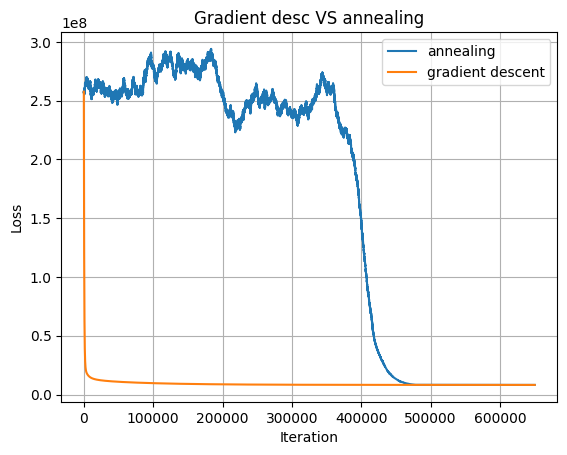

In [53]:
plt.plot(loss_list, label='annealing')
plt.plot([MSEL2Loss(0.1).calc_loss(np.hstack([X_train, np.ones([X_train.shape[0], 1])]), y_train, weights) for weights in w_list], label='gradient descent')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Gradient desc VS annealing')
plt.legend()
plt.grid()
plt.show()

In [54]:
# Сравним траетктории
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :] # разные масштабы признаков
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [55]:
np.random.seed(1)


In [56]:
%%time
loss_list, w_list_ann = simulated_annealing(loss=MSELoss(), X=X, y=y, w_init=w_init, fit_intercept=False, max_iterations=10000, temperature=100000, freedom=3)[1:]

CPU times: user 23.1 ms, sys: 4.19 ms, total: 27.3 ms
Wall time: 35.4 ms


In [57]:
%%time
w_list_gd = gradient_descent(w_init, X, y, MSELoss(), lr=0.001, n_iterations=10000)

CPU times: user 37.8 ms, sys: 2.96 ms, total: 40.7 ms
Wall time: 39.5 ms


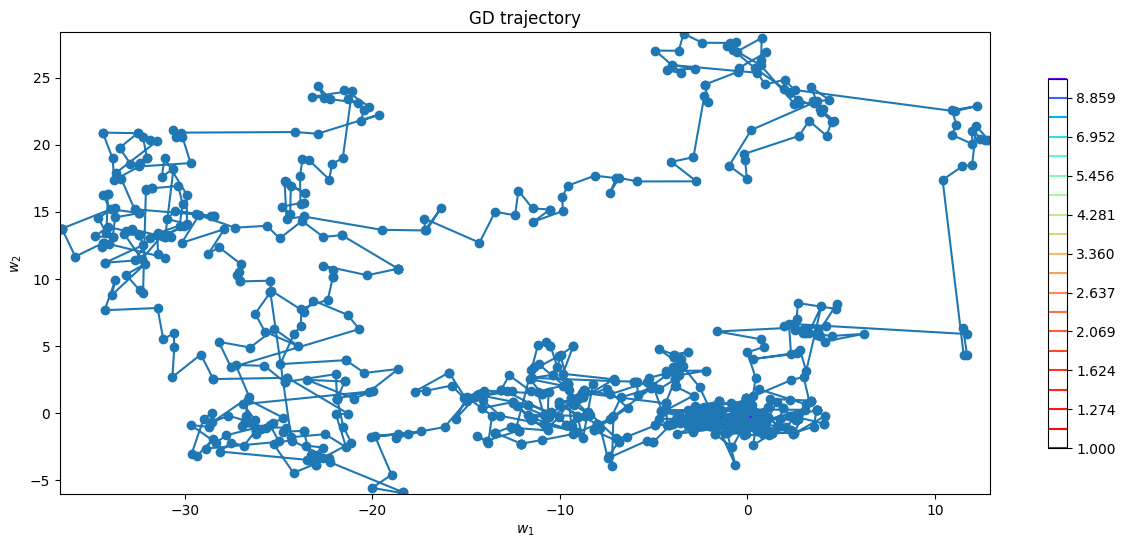

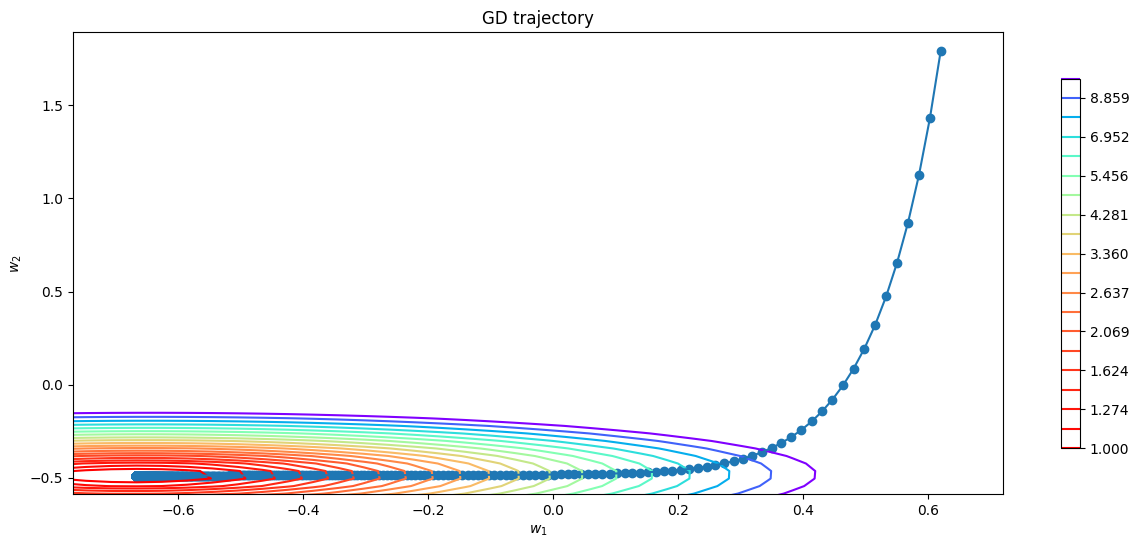

0.8670644395649091
0.9430068174150926


In [58]:
plot_gd(w_list_ann, X, y, MSELoss())
plot_gd(w_list_gd, X, y, MSELoss())
print(loss.calc_loss(X, y, w_list_gd[-1]))
print(loss.calc_loss(X, y, w_list_ann[-1]))

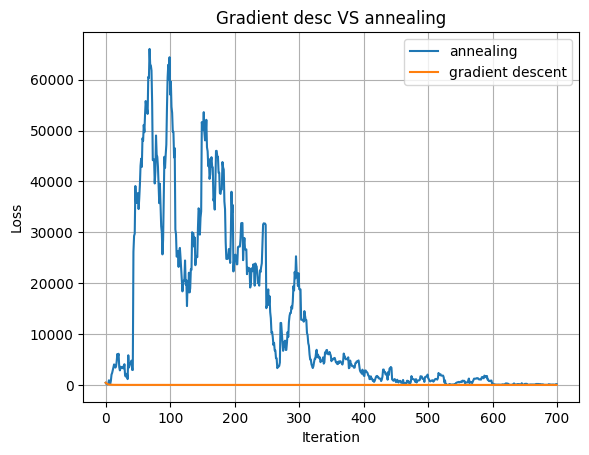

In [59]:
plt.plot(loss_list[:700], label='annealing')
plt.plot([MSELoss().calc_loss(X, y, weights) for weights in w_list_gd[:700]], label='gradient descent')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Gradient desc VS annealing')
plt.legend()
plt.grid()
plt.show()

Отжиг тоже нашел минимум, плохо видно линии уровня на его графике.

#### Вывод
Преимуществ отжига перед градиентным спуском не видно, обе модели получились одинакового качества. Алгоритм хорошо себя проявит в задачах поиска минимумума функций с большим количеством локальных минимумов, в которых градиентный спуск неприменим.